In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn-darkgrid')

from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

myLoc = MultipleLocator(14)

myFmt = DateFormatter('%Y/%m')

In [13]:
df=pd.read_csv('http://taanila.fi/beer.csv')
df.index=pd.to_datetime(df['Month'])
df=df.drop('Month',axis=1)
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


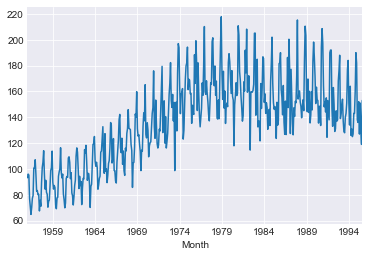

In [14]:
df['Monthly beer production'].plot()

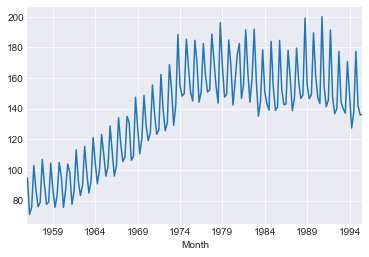

In [16]:
df['Monthly beer production'].resample('Q').mean().plot()

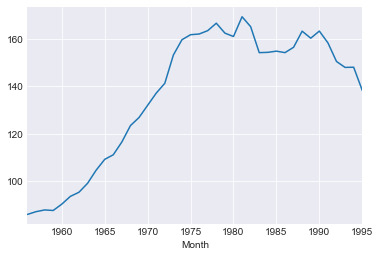

In [17]:
df['Monthly beer production'].resample('Y').mean().plot()

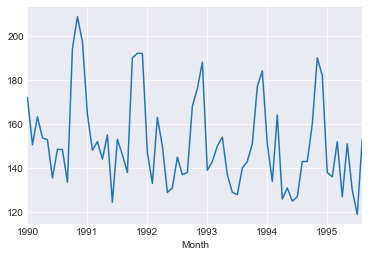

In [18]:
ax1 = df['Monthly beer production']['1990':].plot()

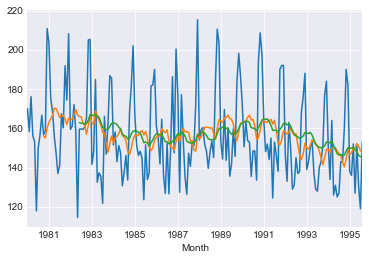

In [24]:
df['Monthly beer production']['1980':].plot()
df['Monthly beer production']['1980':].rolling(10).mean().plot()
df['Monthly beer production']['1980':].rolling(30).mean().plot()

In [25]:
df['beer%'] = df['Monthly beer production'].pct_change()

In [26]:
muutos = pd.concat([df['beer%']], axis=1)
muutos.head()

,beer%
Month,
1956-01-01,NaN
1956-02-01,0.030043
1956-03-01,-0.008333
1956-04-01,-0.190126
1956-05-01,-0.080415


Text(0, 0.5, 'Change (%)')

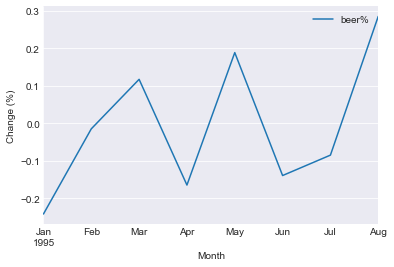

In [33]:
ax2 = muutos['1995-01':].plot()

ax2.set_ylabel('Change (%)')

In [34]:
muutos.describe()

,beer%
count,475.000000
mean,0.010291
std,0.136978
min,-0.348515
25%,-0.083472
50%,0.007299
75%,0.095148
max,0.477204


In [38]:
muutos[(abs(muutos['beer%'])>0.30)]

,beer%
Month,
1965-03-01,0.317805
1973-06-01,-0.348515
1973-07-01,0.477204
1973-10-01,0.345440
1975-10-01,0.324895
1980-12-01,0.329130
1982-06-01,0.392670
1983-01-01,-0.309942
1983-08-01,0.364832


In [56]:
muutos['Weekday'] = muutos.index.weekday

muutos.groupby('Weekday')['beer%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,67.0,0.106503,0.142635,-0.202479,0.002564,0.114127,0.223537,0.452844
1,68.0,0.080714,0.133032,-0.175743,-0.024964,0.086475,0.168132,0.392670
2,69.0,0.014685,0.102387,-0.234375,-0.045802,0.018844,0.080109,0.324895
3,67.0,-0.022871,0.099813,-0.231840,-0.105037,-0.007752,0.033245,0.217391
4,68.0,-0.064691,0.111534,-0.348515,-0.144145,-0.056341,0.015029,0.123631
5,68.0,-0.058660,0.119148,-0.309942,-0.148429,-0.043373,0.018846,0.266023
6,68.0,0.017216,0.148066,-0.281038,-0.070850,0.032333,0.096329,0.477204
